## detect the upper half face

Let's grab some frames, detect your head, then crop the left side in order to save it as a database for further learning.


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
np.set_printoptions(precision=2, suppress=True)
# define plots to be inserted interactively
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

Let's grab some frames. During that time, I recommend to:
- not move the head (I hold them in my hands) and to look at the led of your webcam,
- when it's lit, move your eyes evenly on the screen (try to avoid moving eyebrows or to do sacaddes).

In [2]:
from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client

/Users/laurentperrinet/research/Shared/2018-03-19_StageL3/LeCheapEyeTracker/src/LeCheapEyeTracker/haarcascade_frontalface_default.xml


In [39]:
targets = {}
s_target = '🔴'
s_distra = '🔵'
s_target_bis = '🔵'

s_distra = '🌫'

N_dis = 24
N_margin = 2

targets['left'] = N_margin * s_distra + s_target + 2 * N_dis * s_distra + N_margin * s_distra

targets['center'] = N_margin * s_distra + N_dis * s_distra + s_target + N_dis * s_distra + N_margin * s_distra

targets['right'] = N_margin * s_distra + 2 * N_dis * s_distra + s_target + N_margin * s_distra

null = N_margin * s_distra +  (2 * N_dis + 1) * s_distra + N_margin * s_distra
center = N_margin * s_distra + N_dis * s_distra + s_target_bis + N_dis * s_distra + N_margin * s_distra




for label in targets.keys():
    print('label=', label)
    print (targets[label])

label= left
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= center
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= right
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫


In [27]:
datapath = '/tmp/dataset'
import os
try:
    os.mkdir(datapath)
except:
    pass

for label in targets.keys():
    print('label=', label)    
    try:
        os.mkdir(os.path.join(datapath, label))
    except:
        pass


label= left
label= center
label= right


In [22]:
!ls -lR {datapath}

total 0
drwxr-xr-x  2 laurentperrinet  wheel  64 Mar 20 14:43 center
drwxr-xr-x  2 laurentperrinet  wheel  64 Mar 20 14:43 left
drwxr-xr-x  2 laurentperrinet  wheel  64 Mar 20 14:43 right

/tmp/dataset/center:

/tmp/dataset/left:

/tmp/dataset/right:


In [6]:
import time

In [7]:
from IPython.display import clear_output
for i in range(10):
    clear_output()
    print(i)
    time.sleep(1)

9


In [8]:
import numpy as np
np.random.randint(3)

1

In [9]:
N_frame = 10
for i in range(N_frame):
    clear_output()
    #print('frame', i, '/', N_frame)
    i_choice = np.random.randint(3)
    label = list(targets.keys())[i_choice]
    print(null)
    print(targets[label])
    print(null)

    time.sleep(1)


🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔴🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵


In [10]:
from LeCheapEyeTracker.EyeTrackerServer import Server
from LeCheapEyeTracker.EyeTrackerClient import Client



N_frame = 4
import time
time.sleep(1.)
et = Server()
print ('Time', et.clock())
img0 = et.cam.grab()

H, W, three = img0.shape
movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)

for i in range(N_frame):                
    print('frame', i)
    movie[:, :, :, i] = et.cam.grab()
    time.sleep(0.3)
    
img = et.cam.grab()
et.close()


Time 1001345.657276924
frame 0
frame 1
frame 2
frame 3
Capture released


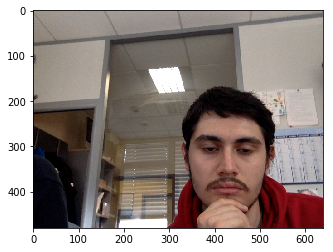

In [11]:
plt.imshow(movie[:, :, ::-1, 0])

In [12]:
movie[100, 307, :, 0]

array([105, 108, 115], dtype=uint8)

In [13]:
import imageio
print(movie[:, :, :, 0].shape)
imageio.imwrite('/tmp/screenshot.png', movie[:, :, :, 0])

(480, 640, 3)


In [14]:
subject_name='anonymous'
N_frame = 64
for i in range(N_frame):
    i_choice = np.random.randint(3)
    label = list(targets.keys())[i_choice]
    print(targets[label])

    filename = os.path.join(datapath, label, subject_name + '_' + str(i) + '.png')
    print(filename)



🔴🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
/tmp/dataset/left/anonymous_0.png
🔴🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
/tmp/dataset/left/anonymous_1.png
🔴🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
/tmp/dataset/left/anonymous_2.png
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔴
/tmp/dataset/right/anonymous_3.png
🔴🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
/tmp/dataset/left/anonymous_4.png
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔴🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
/tmp/dataset/center/anonymous_5.png
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔴🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵
/tmp/dataset/center/anonymous_6.png
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔴
/tmp/dataset/right/anonymous_7.png
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔴
/tmp/dataset/right/anonymous_8.png
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔴
/tmp/dataset/right/anonymous_9.png
🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔵🔴
/tmp/dataset/r

In [37]:
datapath = '/tmp/dataset'
datapath = '/Users/laurentperrinet/research/Shared/2018-03-19_StageL3/anaisbrgs_StageL3/dataset'

def get_stack(datapath=datapath, subject_name='anonymous', N_frame=64, startup_time=1., interframe_time=1., waiting_time=.2):
    try:
        import time
        time.sleep(startup_time)
        et = Server()
        print ('Time', et.clock())
        img0 = et.cam.grab()
        img_face, res, t0 = et.process_frame(img0, et.clock())

        H, W, three = img_face.shape
        #movie = np.zeros((H, W, 3, N_frame), dtype=np.uint8)
        for i in range(N_frame):
            
            clear_output()
            # presentation of stimulus
            i_choice = np.random.randint(3)
            label = list(targets.keys())[i_choice]
            print(null)
            print(null)
            print(targets[label])
            print(null)
            print(null)

            time.sleep(interframe_time)

            frame = et.cam.grab()
            img_face, res, t0 = et.process_frame(frame, et.clock())

            clear_output()
            print(null)
            print(null)
            print(center)
            print(null)
            print(null)

            
            time.sleep(waiting_time)

            filename = os.path.join(datapath, label, subject_name + '_' + str(i) + '.png')
            imageio.imwrite(filename, img_face[:, :, ::-1])

    finally:
        et.close()
    return movie

In [35]:
date = '2018-03-20_'

In [40]:
movie = get_stack(subject_name=date + 'Nicolas')

🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔵🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
Capture released


In [ ]:
movie = get_stack(subject_name=date + 'Anaïs')

In [33]:
movie = get_stack(subject_name=date + 'Laurent')

🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
Capture released


In [19]:
!ls -lR {datapath}

total 0
drwxr-xr-x  26 laurentperrinet  wheel  832 Mar 20 14:40 center
drwxr-xr-x  19 laurentperrinet  wheel  608 Mar 20 14:40 left
drwxr-xr-x  25 laurentperrinet  wheel  800 Mar 20 14:40 right

/tmp/dataset/center:
total 2496
-rw-r--r--  1 laurentperrinet  wheel  50059 Mar 20 14:39 nicolas_10.png
-rw-r--r--  1 laurentperrinet  wheel  50503 Mar 20 14:40 nicolas_11.png
-rw-r--r--  1 laurentperrinet  wheel  49974 Mar 20 14:40 nicolas_13.png
-rw-r--r--  1 laurentperrinet  wheel  49665 Mar 20 14:40 nicolas_15.png
-rw-r--r--  1 laurentperrinet  wheel  50479 Mar 20 14:40 nicolas_16.png
-rw-r--r--  1 laurentperrinet  wheel  50108 Mar 20 14:40 nicolas_19.png
-rw-r--r--  1 laurentperrinet  wheel  50700 Mar 20 14:39 nicolas_2.png
-rw-r--r--  1 laurentperrinet  wheel  50127 Mar 20 14:40 nicolas_28.png
-rw-r--r--  1 laurentperrinet  wheel  50139 Mar 20 14:40 nicolas_33.png
-rw-r--r--  1 laurentperrinet  wheel  50215 Mar 20 14:40 nicolas_34.png
-rw-r--r--  1 laurentperrinet  wheel  50504 Mar 20 14: